<a href="https://colab.research.google.com/github/ancestor9/2026_Spring_Pattern-Recognition/blob/main/Introduction_to_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Deep Learning**
## **One layer neural net (perceptron) can perform linear classification**

<img src="https://miro.medium.com/0*Ib3_FfuOy04kOmfO" width=600>

[참고사이트](https://ocw.mit.edu/courses/6-7960-deep-learning-fall-2024/pages/syllabus/)

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 데이터 및 가중치 설정
x1 = np.linspace(-1, 1, 100)
x2 = np.linspace(-1, 1, 100)
X1, X2 = np.meshgrid(x1, x2)

# 가중치(w)와 편향(b) 임의 설정 (이미지와 유사한 기울기를 위해)
w1, w2 = 2.0, 3.0
b = -0.2

# 2. 선형 결합 계산 (z = w1*x1 + w2*x2 + b)
Z = w1 * X1 + w2 * X2 + b

In [18]:
X_reshaped_for_dot = X.reshape(X.shape[0], -1)
Z_flat = np.dot(W, X_reshaped_for_dot)
Z = Z_flat.reshape(X1.shape) + b

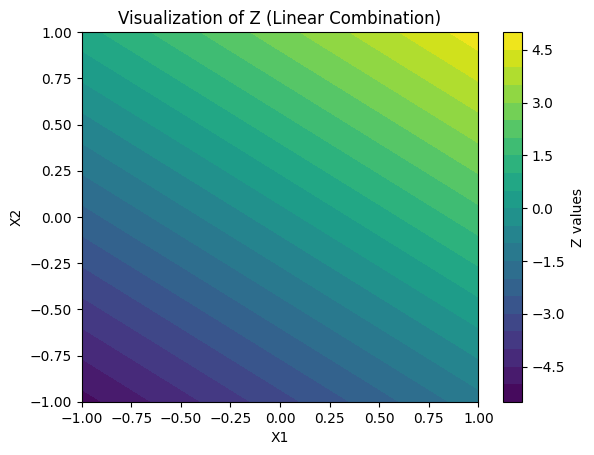

In [20]:
im = plt.contourf(X1, X2, Z, levels=20, cmap='viridis')
plt.colorbar(im, label='Z values')
plt.title('Visualization of Z (Linear Combination)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [21]:
# 3. 활성화 함수 적용 (Step function: y = 1 if z > 0 else 0)
Y = np.where(Z > 0, 1, 0)

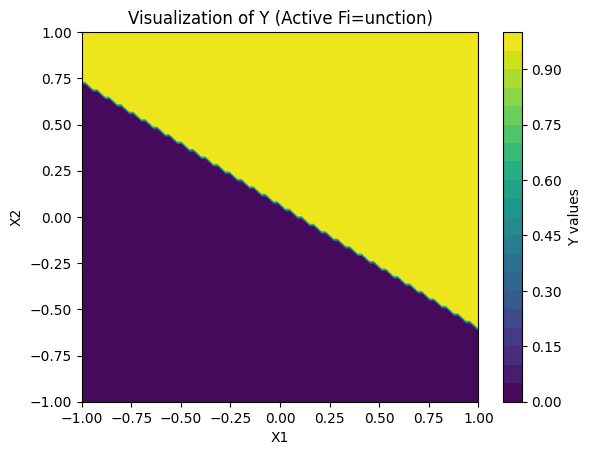

In [22]:
im = plt.contourf(X1, X2, Y, levels=20, cmap='viridis')
plt.colorbar(im, label='Y values')
plt.title('Visualization of Y (Active Fi=unction)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

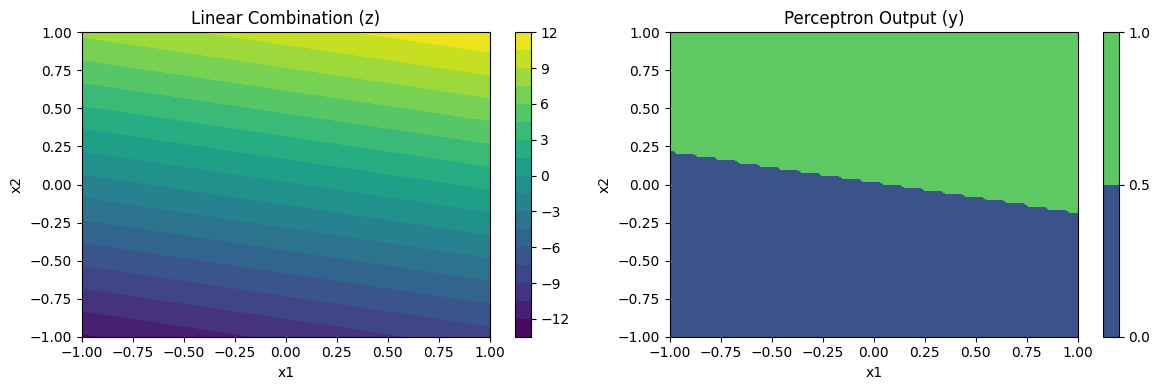

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 데이터 및 가중치 설정
x1 = np.linspace(-1, 1, 100)
x2 = np.linspace(-1, 1, 100)
X1, X2 = np.meshgrid(x1, x2)

# 가중치(w)와 편향(b) 임의 설정 (이미지와 유사한 기울기를 위해)
w1, w2 = 2.0, 10.0
b = -0.2

# 2. 선형 결합 계산 (z = w1*x1 + w2*x2 + b)
Z = w1 * X1 + w2 * X2 + b

# 3. 활성화 함수 적용 (Step function: y = 1 if z > 0 else 0)
Y = np.where(Z > 0, 1, 0)

# --- 시각화 ---
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# 왼쪽 그래프: z (연속적인 값)
im1 = ax[0].contourf(X1, X2, Z, levels=20, cmap='viridis')
ax[0].set_title('Linear Combination (z)')
ax[0].set_xlabel('x1')
ax[0].set_ylabel('x2')
fig.colorbar(im1, ax=ax[0])

# 오른쪽 그래프: y (분류 결과)
im2 = ax[1].contourf(X1, X2, Y, levels=1, cmap='viridis')
ax[1].set_title('Perceptron Output (y)')
ax[1].set_xlabel('x1')
ax[1].set_ylabel('x2')
fig.colorbar(im2, ax=ax[1])

plt.tight_layout()
plt.show()

## **Activation Function(활성화 함수)**

In [28]:
import gradio as gr

# X1, X2는 이미 정의되어 있으므로 다시 계산하지 않고 사용합니다.
# x1, x2 = np.linspace(-1, 1, 100)
# X1, X2 = np.meshgrid(x1, x2)

# Define activation functions
def step_function(z):
    return np.where(z > 0, 1, 0)

def relu_function(z):
    return np.maximum(0, z)

def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))

def tanh_function(z):
    return np.tanh(z)

def visualize_perceptron(w1, w2, b, activation_function_name):
    # 2. 선형 결합 계산 (z = w1*x1 + w2*x2 + b)
    Z = w1 * X1 + w2 * X2 + b

    # 3. 활성화 함수 적용
    if activation_function_name == 'Step':
        Y = step_function(Z)
    elif activation_function_name == 'ReLU':
        Y = relu_function(Z)
    elif activation_function_name == 'Sigmoid':
        Y = sigmoid_function(Z)
    elif activation_function_name == 'Tanh':
        Y = tanh_function(Z)
    else:
        raise ValueError("Invalid activation function selected.")

    # --- 시각화 ---
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    # 왼쪽 그래프: z (연속적인 값)
    im1 = ax[0].contourf(X1, X2, Z, levels=20, cmap='viridis')
    ax[0].set_title(f'Linear Combination (z)\nw1={w1:.2f}, w2={w2:.2f}, b={b:.2f}')
    ax[0].set_xlabel('x1')
    ax[0].set_ylabel('x2')
    fig.colorbar(im1, ax=ax[0])

    # 오른쪽 그래프: y (활성화 함수 결과)
    # ReLU, Sigmoid, Tanh의 경우 출력 범위가 Step과 다르므로 levels를 다르게 설정하거나 자동 설정되도록 합니다.
    if activation_function_name == 'Step':
        im2 = ax[1].contourf(X1, X2, Y, levels=1, cmap='viridis')
    else:
        im2 = ax[1].contourf(X1, X2, Y, levels=20, cmap='viridis') # For continuous functions

    ax[1].set_title(f'Perceptron Output (y) with {activation_function_name}')
    ax[1].set_xlabel('x1')
    ax[1].set_ylabel('x2')
    fig.colorbar(im2, ax=ax[1])

    plt.tight_layout()
    return fig

# Gradio 인터페이스 생성
iface = gr.Interface(
    fn=visualize_perceptron,
    inputs=[
        gr.Slider(minimum=-10.0, maximum=10.0, value=2.0, label="w1"),
        gr.Slider(minimum=-10.0, maximum=10.0, value=3.0, label="w2"),
        gr.Slider(minimum=-5.0, maximum=5.0, value=-0.2, label="b"),
        gr.Dropdown(choices=['Step', 'ReLU', 'Sigmoid', 'Tanh'], value='Step', label="Activation Function")
    ],
    outputs=gr.Plot(),
    title="Perceptron Visualization with Gradio",
    description="Adjust w1, w2, and b, and choose an activation function to see how the perceptron's linear combination (Z) and output (Y) change."
)

iface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://19ff3a257dbf59a204.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## **Decision Boundary**

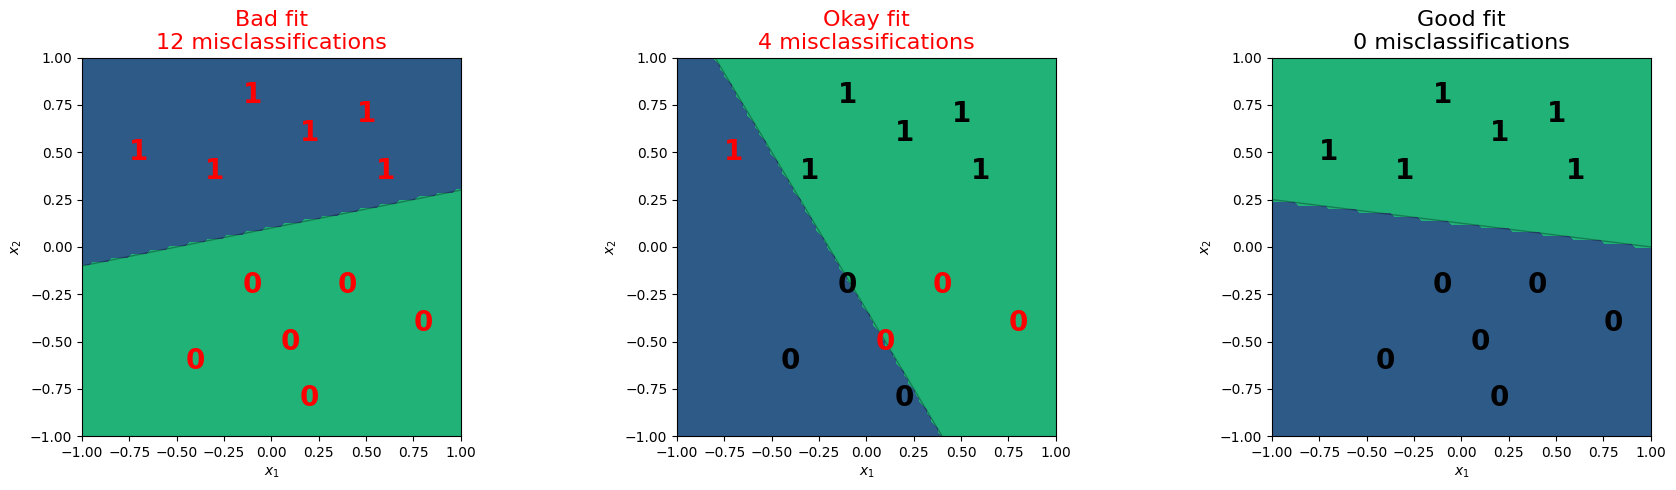

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 1. 데이터 설정 (원본 이미지와 최대한 유사한 좌표)
X = np.array([
    [-0.7, 0.5], [-0.3, 0.4], [-0.1, 0.8], [0.2, 0.6], [0.5, 0.7], [0.6, 0.4], # 클래스 1
    [-0.4, -0.6], [-0.1, -0.2], [0.1, -0.5], [0.4, -0.2], [0.8, -0.4], [0.2, -0.8] # 클래스 0
])
y = np.array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

# 2. 커스텀 색상 맵 설정 (원본의 진한 파랑과 에메랄드 초록)
custom_cmap = ListedColormap(['#2E5A88', '#20B277'])

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
titles = ['Bad fit', 'Okay fit', 'Good fit']

# 가중치(w1, w2)와 편향(b)을 수동으로 조절하여 단계별 모습 재현
# z = w1*x1 + w2*x2 + b
params = [
    {'w': [0.1, -0.5], 'b': 0.05},  # Bad fit: 거의 세로로 누워 오답 많음
    {'w': [0.5, 0.3], 'b': 0.1},    # Okay fit: 어느 정도 맞음
    {'w': [0.1, 0.8], 'b': -0.1}    # Good fit: 완벽히 분리
]

x_range = np.linspace(-1, 1, 100)
xx, yy = np.meshgrid(x_range, x_range)

for i, p in enumerate(params):
    # 선형 결합 계산
    Z = p['w'][0] * xx + p['w'][1] * yy + p['b']
    # 활성화 함수 (0보다 크면 1, 작으면 0)
    Y_grid = np.where(Z > 0, 1, 0)

    # 배경 색상 채우기
    axes[i].contourf(xx, yy, Y_grid, cmap=custom_cmap, alpha=1.0)

    # 결정 경계선 (z=0인 지점) 그리기
    # x2 = -(w1*x1 + b) / w2
    line_y = -(p['w'][0] * x_range + p['b']) / p['w'][1]
    axes[i].plot(x_range, line_y, color='black', linewidth=1, alpha=0.3)

    # 데이터 포인트 및 오분류 체크
    misclassified = 0
    y_pred = np.where(p['w'][0] * X[:,0] + p['w'][1] * X[:,1] + p['b'] > 0, 1, 0)

    for idx, (point, target) in enumerate(zip(X, y)):
        is_correct = (target == y_pred[idx])
        color = 'black' if is_correct else 'red'
        if not is_correct: misclassified += 1

        axes[i].text(point[0], point[1], str(target), color=color,
                     fontsize=20, fontweight='bold', ha='center', va='center')

    axes[i].set_title(f"{titles[i]}\n{misclassified} misclassifications", fontsize=16, color='red' if misclassified > 0 else 'black')
    axes[i].set_xlim(-1, 1)
    axes[i].set_ylim(-1, 1)
    axes[i].set_aspect('equal')
    axes[i].set_xlabel('$x_1$')
    axes[i].set_ylabel('$x_2$')

plt.tight_layout()
plt.show()

### **토론 1. 3가지 fits(학습결과)를 각 모델의 성능지표(performance metrics)를 생각해보고 토의하라**

### **토론 2. 왜 행렬과 벡터를 알아야 하지?**

### **토론 3. 확률분포와 미분은 알아야 하나?**